### Some Basic Commands

In [7]:
# Do this then do that
print("Hello World!")
print("My name is Nathan")
name = input("What\'s your name?'")

Hello World!
My name is Nathan
What's your name?'Mike


In [8]:
# If this condition is true, perform this action; otherwise, do that action
if(name == "Nathan"):
    print("Hey bud!")
else:
    print("Hello stranger, I dunno you")

Hello stranger, I dunno you


In [9]:
# Do this action that number of times
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [10]:
# Keep doing that until this condition is true
i = 0
while(i < 10):
    print(i)
    i = i + 1
    

0
1
2
3
4
5
6
7
8
9


### Practice with "Factorial Calculator"

> For instance, "four factorial" is written as "4!" and means 1×2×3×4 = 24. In general, n! ("enn factorial") means the product of all the whole numbers from 1 to n; that is, n! = 1×2×3×...×n. (For various reasons, 0! is defined to be equal to 1, not 0)

Now, you have to code a factorial calculator. Hint: you can do it in at least 3 ways.

In [2]:
def factorial1(n):
    result = 1
    for i in range(n):
        result = result * (i+1)
    return result
print(factorial1(3))

def factorial2(n):
    if (n == 0):
        return 1
    return n*factorial2(n-1)
print(factorial2(10))

import math as m
print(m.factorial(10))

6
3628800
3628800


### Hands-on Example Analyzing a Sales Data Set

#### 1. import the dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
raw = pd.read_csv('sample-sales.csv', parse_dates=['date'])
print(raw)

     account number                           name       sku category  \
0            296809                    Carroll PLC  QN-82852     Belt   
1             98022              Heidenreich-Bosco  MJ-21460    Shoes   
2            563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt   
3             93356                  Waters-Walker  AS-93055    Shirt   
4            659366                  Waelchi-Fahey  AS-93055    Shirt   
5            563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt   
6            995267                  Cole-Eichmann  GS-86623    Shoes   
7            524021               Hegmann and Sons  LL-46261    Shoes   
8            929400  Senger, Upton and Breitenberg  LW-86841    Shoes   
9            563905  Kerluke, Reilly and Bechtelar  KV-99194    Shirt   
10           995267                  Cole-Eichmann  KV-99194    Shirt   
11           524021               Hegmann and Sons  QN-82852     Belt   
12           758133      Kihn, McClure and Denesik 

#### 2. get a brief grasp of the dataset

In [23]:
raw.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [25]:
raw.shape

(1000, 8)

In [28]:
raw.describe().T
raw.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


#### 3. add a feature to the data set
If I decide that all customers buying more than 10 items at a time is a whole sale customer, so how can I tag and count the number of whole sale customer ?

In [30]:
for i in raw.index:
    if (raw.at[i,'quantity'] > 10):
        raw.at[i,'wholesale'] = True
    else:
        raw.at[i,'wholesale'] = False
raw.head()


,account number,name,sku,category,quantity,unit price,ext price,date,wholesale
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03,True
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44,True
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24,True
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11,False
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27,True


In [32]:
wholesale_customers = raw.groupby('wholesale')
wholesale_customers.size()

wholesale
False    510
True     490
dtype: int64

#### 4. plot data

In [33]:
#remove some columns to make the analysis easier
customers = raw[['name', 'ext price', 'category', 'date']] 
customers.head()

,name,ext price,category,date
0,Carroll PLC,578.24,Belt,2014-09-27 07:13:03
1,Heidenreich-Bosco,1018.78,Shoes,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",289.92,Shirt,2014-03-01 10:51:24
3,Waters-Walker,413.40,Shirt,2013-11-17 20:41:11
4,Waelchi-Fahey,1793.52,Shirt,2014-01-03 08:14:27


In [34]:
customer_group = customers.groupby('name')
customer_group.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

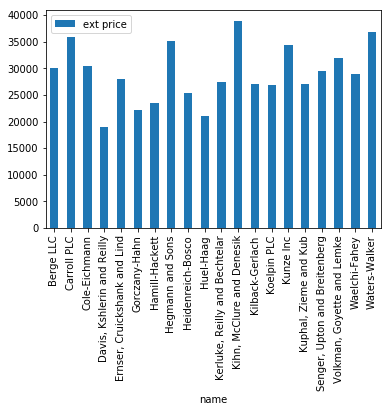

In [35]:
#simple sales plot
sales_totals = customer_group.sum()
sales_plot = sales_totals.plot(kind='bar') 

Text(0,0.5,'Sales ($)')

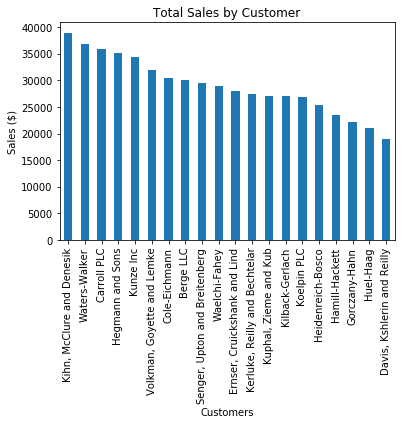

In [36]:
#make it prettier
sales_plot = sales_totals.sort_values(by='ext price', ascending=False).plot(kind='bar',legend=None, title="Total Sales by Customer")
sales_plot.set_xlabel("Customers")
sales_plot.set_ylabel("Sales ($)")

In [38]:
#now I want to see the purchase frequency, hint: use histogram with ext price
#remember to choose just the relevant data first
purchase_patterns = raw[['ext price', 'date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


Text(0,0.5,'number of Orders')

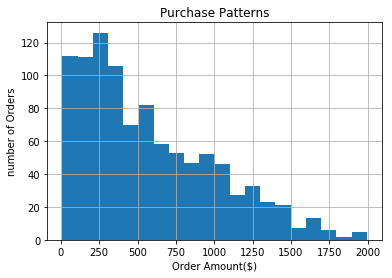

In [39]:
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("number of Orders")

In [42]:
#how about plotting them into a time serie
#hint: resample - changing the frequency of your time series observations.
purchase_patterns = raw[['ext price', 'date']]
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()

,ext price
date,
2014-09-27 07:13:03,578.24
2014-07-29 02:10:44,1018.78
2014-03-01 10:51:24,289.92
2013-11-17 20:41:11,413.40
2014-01-03 08:14:27,1793.52


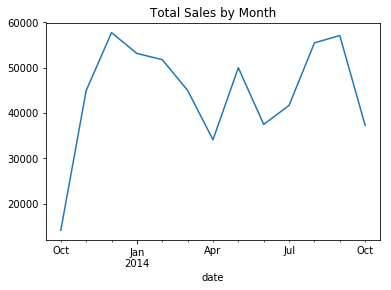

In [43]:
purchase_plot = purchase_patterns.resample('M').sum().plot(title="Total Sales by Month", 
                                                           legend=None)

#### 4. save the result

In [45]:
fig = purchase_plot.get_figure()
fig.savefig("total-sales.png")


# Heading

something here